goal: clean our messy dataset

In [1]:
import csv
import pandas as pd
df_pyktok = pd.read_csv('./pyktok_output.csv')

/var/folders/6y/w5dznchj3w9cyjt81v33hf1c0000gn/T/ipykernel_80314/3236870642.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def determine_category(info):
    if type(info) == str:
        if 'sports' in info.lower() or 'fitness' in info.lower() or 'outdoor' in info.lower():
            return 'sports'
        elif 'beauty' in info.lower() or 'style' in info.lower():
            return 'beauty'
        elif 'society' in info.lower() or 'news' in info.lower() or 'social issues' in info.lower():
            return 'society'
        else:
            return 'other'
    else:
        return None
    
#label category    
df_pyktok['category'] = df_pyktok['diversificationLabels'].apply(determine_category)

In [4]:
category_counts = df_pyktok['category'].value_counts(dropna=False)
category_counts
#since there are only  148 none values, we'll manually look thru and check the categories
#df_pyktok.to_csv('./df_pyktok.csv')
df_pyktok = pd.read_csv('./df_pyktok.csv')

In [5]:
link_to_category_dict = pd.Series(df_pyktok['category'].values, index=df_pyktok['video_id']).to_dict()
link_to_likes_dict = pd.Series(df_pyktok['video_diggcount'].values, index=df_pyktok['video_id']).to_dict()
link_to_author_dict = pd.Series(df_pyktok['author_username'].values, index=df_pyktok['video_id']).to_dict()

In [6]:
import json

with open('./original_merged_data.json') as f:
    dct_scraped = json.load(f)

dct_scraped[0]

{'distributed_link': 'https://www.tiktok.com/@_giannalove/video/7325171122000055598',
 'rec_links': {'beauty_rec_1': 'https://www.tiktok.com/@certified_hassan/video/7360247028833733893',
  'beauty_rec_2': 'https://www.tiktok.com/@nsw.trainvlogs/video/7360242264662199568',
  'beauty_rec_3': 'https://www.tiktok.com/@zachking/video/7338816875956030766',
  'beauty_rec_4': 'https://www.tiktok.com/@user1013040614268/video/7360258895568211205',
  'beauty_rec_5': 'https://www.tiktok.com/@riize_official/video/7360211842804796689',
  'beauty_rec_6': 'https://www.tiktok.com/@sugaritumanisss/video/7360387186988043525',
  'beauty_rec_7': 'https://www.tiktok.com/@_giannalove/video/7350718404279438634',
  'beauty_rec_8': 'https://www.tiktok.com/@deboraseoane/video/7360487735368502533',
  'sports_rec_1': 'https://www.tiktok.com/@wsgwitit20/video/7360386897736207624',
  'sports_rec_2': 'https://www.tiktok.com/@_giannalove/video/7350718404279438634',
  'sports_rec_3': 'https://www.tiktok.com/@itsyaboyau

In [7]:
df_pyktok

,Unnamed: 0,video_id,video_timestamp,video_duration,video_locationcreated,suggested_words,diversificationLabels,video_diggcount,video_sharecount,video_commentcount,...,video_stickers,author_username,author_name,author_followercount,author_followingcount,author_heartcount,author_videocount,author_diggcount,author_verified,category
0,0,7337796801665256734,2024-02-20T16:19:26,9.0,US,"Loaded Fries, Fries, chicken fried, Loaded Fre...","Cooking,Lifestyle",24100.0,7190.0,35.0,...,NaN,banginbuns,Bangin Buns,NaN,NaN,NaN,NaN,NaN,False,beauty
1,1,7344732962845429034,2024-03-10T09:55:51,5.0,US,NaN,"Sports News,Sport & Outdoor",7234.0,162.0,522.0,...,NaN,americafirst617,AmericaFirst617,NaN,NaN,NaN,NaN,NaN,False,sports
2,2,7345958018644708650,2024-03-13T17:09:14,11.0,US,"pierson and brent, pierson, jackets, brentrive...","Lip-sync,Performance",302800.0,4763.0,270.0,...,NaN,brentrivera,Brent Rivera,NaN,NaN,NaN,NaN,NaN,True,other
3,3,7334501338652413189,2024-02-11T19:11:13,13.0,EG,NaN,"Traditional Sports,Sport & Outdoor",527200.0,3471.0,15000.0,...,NaN,caf_online,CAF_Online,NaN,NaN,NaN,NaN,NaN,True,sports
4,4,7359026320099020037,2024-04-17T22:20:39,27.0,PH,NaN,NaN,315.0,14.0,9.0,...,NaN,hellooo.aya,hello aya ྀི,NaN,NaN,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,2192,7333769581942672682,2024-02-09T19:51:52,29.0,US,"whip, Cracking A Whips, guy whips massive chai...","Traditional Sports,Sport & Outdoor",38100.0,767.0,1245.0,...,NaN,winrichadam,winrichadam,NaN,NaN,NaN,NaN,NaN,False,sports
2193,2193,7358821752132078866,2024-04-17T09:06:50,14.0,US,NaN,"Outfit,Beauty & Style",115.0,3.0,22.0,...,NaN,tayyabawan751,🦁 طیب اعوان 🦁🗡️🦍,NaN,NaN,NaN,NaN,NaN,False,beauty
2194,2194,7337631130629229829,2024-02-20T05:36:22,16.0,PH,"people, xia speaking british, xia boyfriend, p...","Finger Dance & Basic Dance,Talents",1400000.0,9923.0,22600.0,...,NaN,xiavigor__,xia,NaN,NaN,NaN,NaN,NaN,False,other
2195,2195,7359982276802792710,2024-04-20T12:10:13,15.0,PK,NaN,Random Shoot,889.0,3.0,65.0,...,NaN,saqibmurshid302,saqibmurshid,NaN,NaN,NaN,NaN,NaN,False,other


In [8]:
#main code block
#we rebuild the dataset with the categories
rows = []
for item in dct_scraped:
    dst_id = item['distributed_link'].split('/')[-1].split('?')[0]
    dstr_category = None
    dstr_author = None
    
    try: #check if we have pyktok data for video
        dstr_category = link_to_category_dict[int(dst_id)]
        dstr_author = link_to_author_dict[int(dst_id)]
    except:
        pass
    
    for rec_type, rec_link in item['rec_links'].items():
        persona = rec_type.split('_')[0]
        rec_id = None
        rec_category = None
        rec_author = None
        rec_type = rec_type.replace("control_society_rec", 'control_rec')
        
        if rec_link:
            rec_id = rec_link.split('/')[-1].split('?')[0]
        
        try:
            rec_category = link_to_category_dict[int(rec_id)]
            rec_author = link_to_author_dict[int(rec_id)]
        except:
            pass
        
        rows.append({
                    'distributed_link_id': dst_id,
                    'distributed_link_author': dstr_author,
                    'distributed_link_category': dstr_category,
                    'persona_category': persona,
                    'rec_category': rec_category,
                    'rec_author': rec_author
                })


df_categorized_temp = pd.DataFrame(rows)

In [9]:
df_categorized = df_categorized_temp.groupby(
    ['distributed_link_id', 'persona_category']
).agg({
    'distributed_link_category':'first',
    'distributed_link_author':'first',
    'rec_category': list,  # List all categories
    'rec_author': list,
}).reset_index()



In [10]:
df_categorized

,distributed_link_id,persona_category,distributed_link_category,distributed_link_author,rec_category,rec_author
0,7238391829421395243,beauty,None,leah.givestipss,"[other, None, None, None, None, None, None, None]","[rileyscallon, None, None, None, None, None, N..."
1,7238391829421395243,control,None,leah.givestipss,"[sports, None, beauty, sports, other, beauty, ...","[denizms3_, None, good.creation, snookerchamp1..."
2,7238391829421395243,society,None,leah.givestipss,"[other, other, other, society, other, other, o...","[johayn.jumma, millenaeli, manu.gutierre8, cbs..."
3,7238391829421395243,sports,None,leah.givestipss,"[other, other, other, None, None, other, other...","[iamnzae, nonbeatsz, icafabria, None, None, ka..."
4,7287664074081586438,beauty,sports,taylerfit,"[sports, sports, sports, beauty, sports, sport...","[taylerfit, taylerfit, taylerfit, packjower, t..."
...,...,...,...,...,...,...
395,7357026311220612394,sports,society,the_inconvenient_truth88,"[sports, beauty, other, sports, other, sports,...","[notgracefuger, kxks.official, girlonset, ibra..."
396,7358538332013366570,beauty,society,msnbc,"[other, other, other, other, other, other, oth...","[donmahluvinlandrygame, uespiiiii.1115, megaam..."
397,7358538332013366570,control,society,msnbc,"[other, sports, sports, other, None, other, ot...","[steves.adventure, kazetskaya_mishka14, darkha..."
398,7358538332013366570,society,society,msnbc,"[other, society, None, other, other, society, ...","[mebye.15, sbsnews_au, None, filssawadog, quee..."


In [12]:
from collections import Counter

def analysis(row,target):
    """basic analysis of our data"""
    target_category = row[target]
    category_counts = Counter(row['rec_category'])
    highest_count = max(category_counts.values())
    top_categories = [category for category, count in category_counts.items() if count == highest_count]

    isTopCount = target_category in top_categories
    num_rec_author = sum(1 for rec in row['rec_author'] if rec != None)
    num_rec_category = sum(1 for rec in row['rec_category'] if rec != None)
    propCategory = 0
    propSameAuthor = 0
    if target_category != None:
            if num_rec_category:
                propCategory = (category_counts[target_category] / num_rec_category)
            if num_rec_author:
                propSameAuthor = Counter(row['rec_author'])[row['distributed_link_author']] / num_rec_author

    isMajorityCount = propCategory > 0.5
    isFirst3Position = target_category in row['rec_category'][:3]
    isFirstPosition = target_category == row['rec_category'][0]
    
    return isTopCount, propCategory, isMajorityCount,isFirst3Position, isFirstPosition, propSameAuthor

df_categorized[['isTopCount_persona','prop_persona', 'isMajorityCount_persona', 'isFirst3Position_persona', 'isFirstPosition_persona', 'propSameAuthor']] = df_categorized.apply(lambda row: analysis(row, 'persona_category'), axis=1, result_type='expand')
df_categorized[['isTopCount_dst','prop_dst', 'isMajorityCount_dst', 'isFirst3Position_dst', 'isFirstPosition_dst','propSameAuthor']] = df_categorized.apply(lambda row: analysis(row, 'distributed_link_category'), axis=1, result_type='expand')


In [13]:
df_categorized.to_csv('./cleaned.csv')

In [14]:
df_categorized

,distributed_link_id,persona_category,distributed_link_category,distributed_link_author,rec_category,rec_author,isTopCount_persona,prop_persona,isMajorityCount_persona,isFirst3Position_persona,isFirstPosition_persona,propSameAuthor,isTopCount_dst,prop_dst,isMajorityCount_dst,isFirst3Position_dst,isFirstPosition_dst
0,7238391829421395243,beauty,None,leah.givestipss,"[other, None, None, None, None, None, None, None]","[rileyscallon, None, None, None, None, None, N...",False,0.000000,False,False,False,0.00,True,0.000,False,True,False
1,7238391829421395243,control,None,leah.givestipss,"[sports, None, beauty, sports, other, beauty, ...","[denizms3_, None, good.creation, snookerchamp1...",False,0.000000,False,False,False,0.00,False,0.000,False,True,False
2,7238391829421395243,society,None,leah.givestipss,"[other, other, other, society, other, other, o...","[johayn.jumma, millenaeli, manu.gutierre8, cbs...",False,0.125000,False,False,False,0.00,False,0.000,False,False,False
3,7238391829421395243,sports,None,leah.givestipss,"[other, other, other, None, None, other, other...","[iamnzae, nonbeatsz, icafabria, None, None, ka...",False,0.000000,False,False,False,0.00,False,0.000,False,False,False
4,7287664074081586438,beauty,sports,taylerfit,"[sports, sports, sports, beauty, sports, sport...","[taylerfit, taylerfit, taylerfit, packjower, t...",False,0.125000,False,False,False,0.75,True,0.625,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,7357026311220612394,sports,society,the_inconvenient_truth88,"[sports, beauty, other, sports, other, sports,...","[notgracefuger, kxks.official, girlonset, ibra...",True,0.571429,True,True,True,0.00,False,0.000,False,False,False
396,7358538332013366570,beauty,society,msnbc,"[other, other, other, other, other, other, oth...","[donmahluvinlandrygame, uespiiiii.1115, megaam...",False,0.000000,False,False,False,0.00,False,0.000,False,False,False
397,7358538332013366570,control,society,msnbc,"[other, sports, sports, other, None, other, ot...","[steves.adventure, kazetskaya_mishka14, darkha...",False,0.000000,False,False,False,0.00,False,0.000,False,False,False
398,7358538332013366570,society,society,msnbc,"[other, society, None, other, other, society, ...","[mebye.15, sbsnews_au, None, filssawadog, quee...",False,0.400000,False,True,False,0.00,False,0.400,False,True,False


Plots

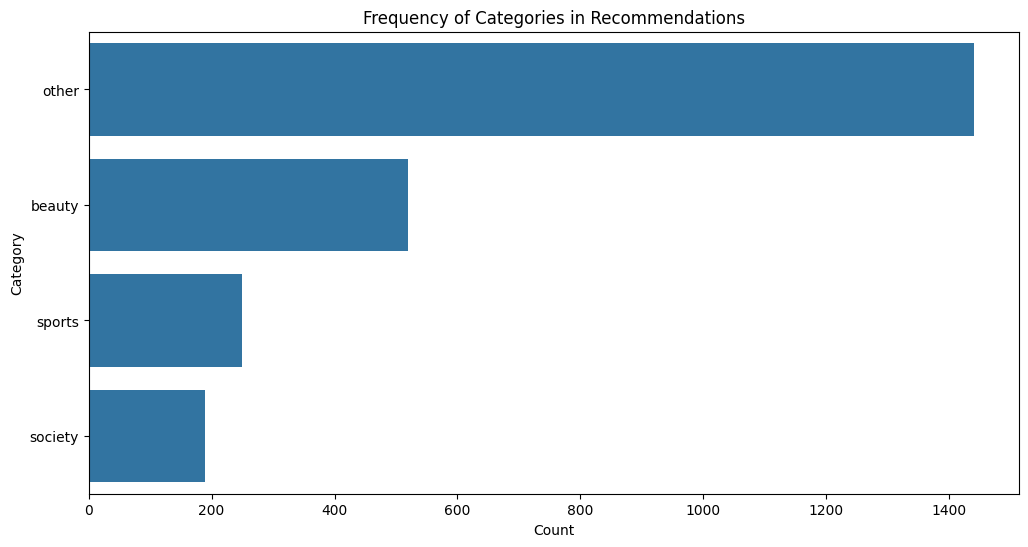

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


all_categories = [category for sublist in df_categorized['rec_category'].tolist() for category in sublist if category is not None]
plt.figure(figsize=(12, 6))
sns.countplot(y=all_categories, order=pd.Series(all_categories).value_counts().index)
plt.title('Frequency of Categories in Recommendations')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

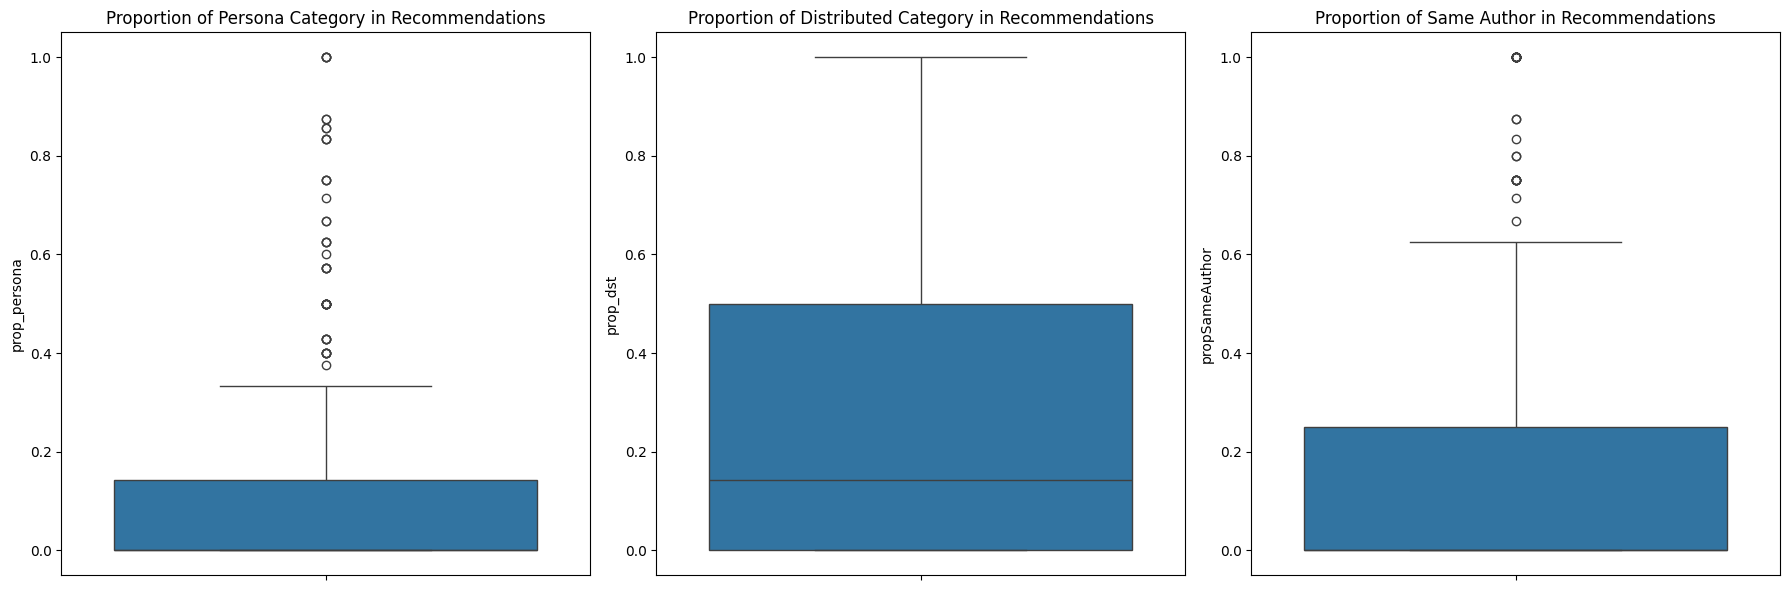

In [58]:
# Create a boxplot to explore the proportion properties
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
sns.boxplot(data=df_categorized, y='prop_persona', ax=axes[0]).set_title('Proportion of Persona Category in Recommendations')
sns.boxplot(data=df_categorized, y='prop_dst', ax=axes[1]).set_title('Proportion of Distributed Category in Recommendations')
sns.boxplot(data=df_categorized, y='propSameAuthor', ax=axes[2]).set_title('Proportion of Same Author in Recommendations')
plt.tight_layout()
plt.show()

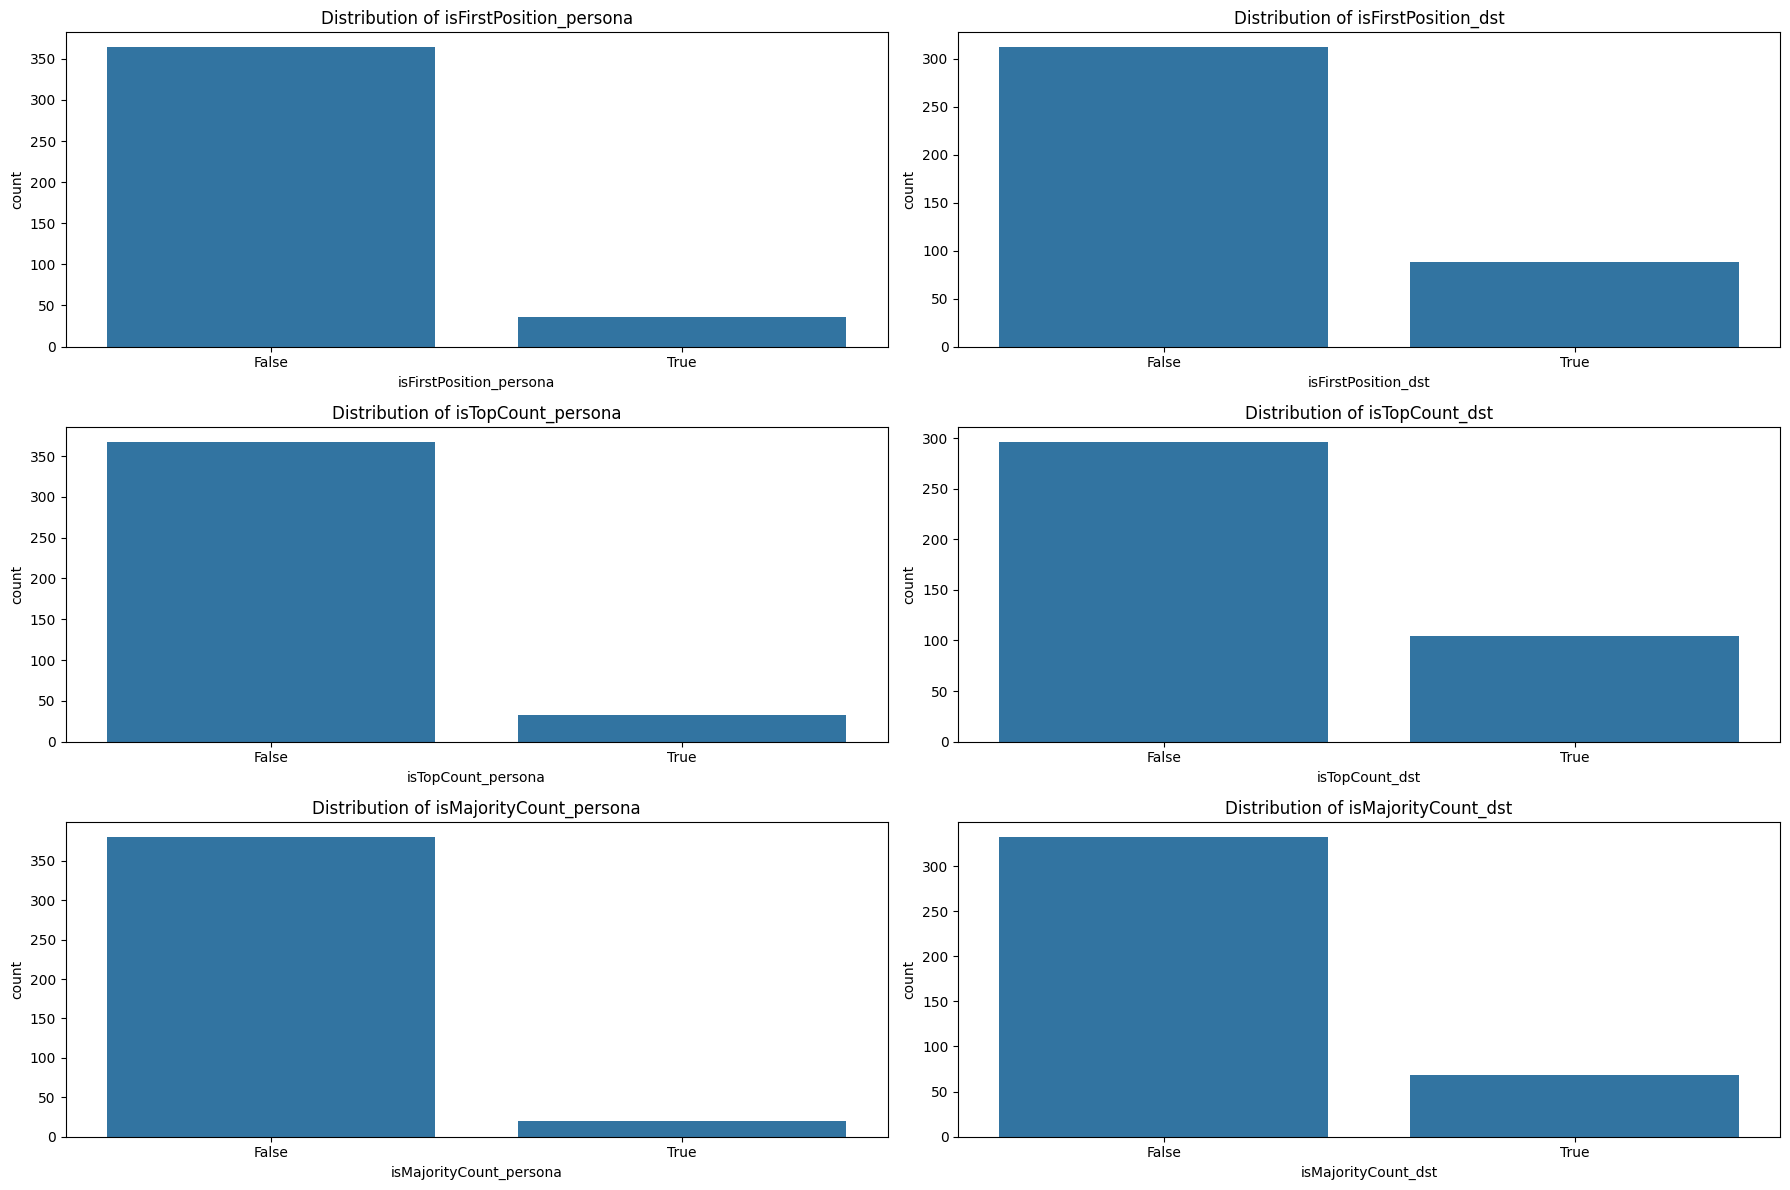

In [17]:
# Bar plots for boolean columns related to position and count
boolean_columns = ['isFirstPosition_persona', 'isFirstPosition_dst', 'isTopCount_persona', 'isTopCount_dst', 'isMajorityCount_persona', 'isMajorityCount_dst']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for idx, col in enumerate(boolean_columns):
    sns.countplot(data=df_categorized, x=col, ax=axes[idx//2, idx%2]).set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

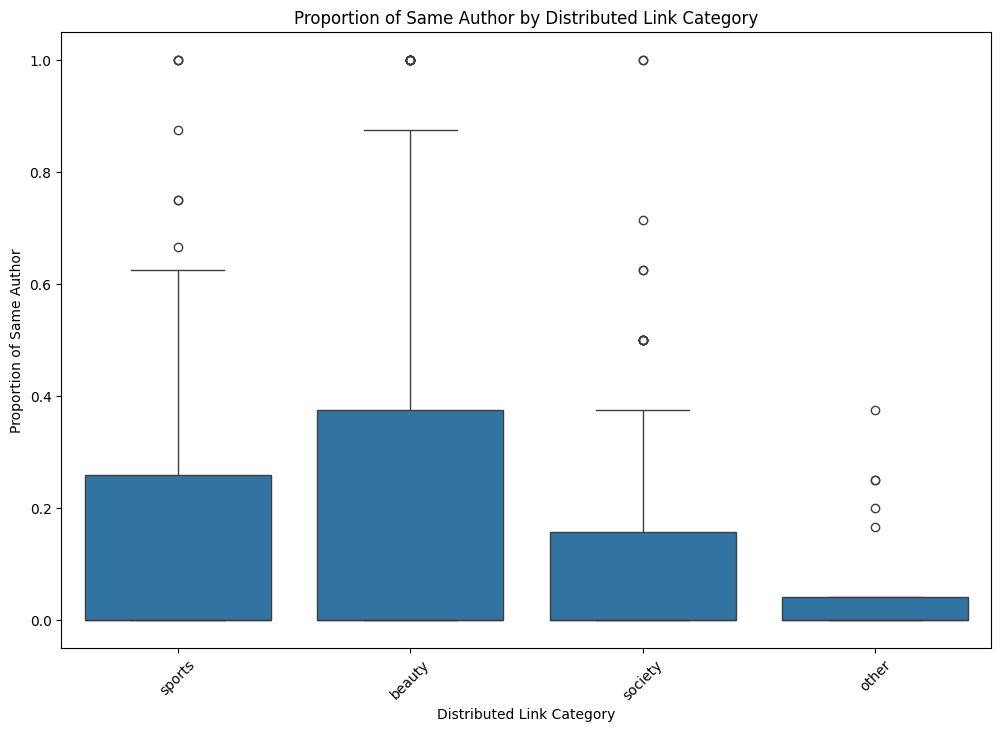

In [18]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='distributed_link_category', y='propSameAuthor', data=df_categorized)
plt.title('Proportion of Same Author by Distributed Link Category')
plt.xlabel('Distributed Link Category')
plt.ylabel('Proportion of Same Author')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()

In [19]:
df_filtered = df_categorized[df_categorized['persona_category'] != 'control']

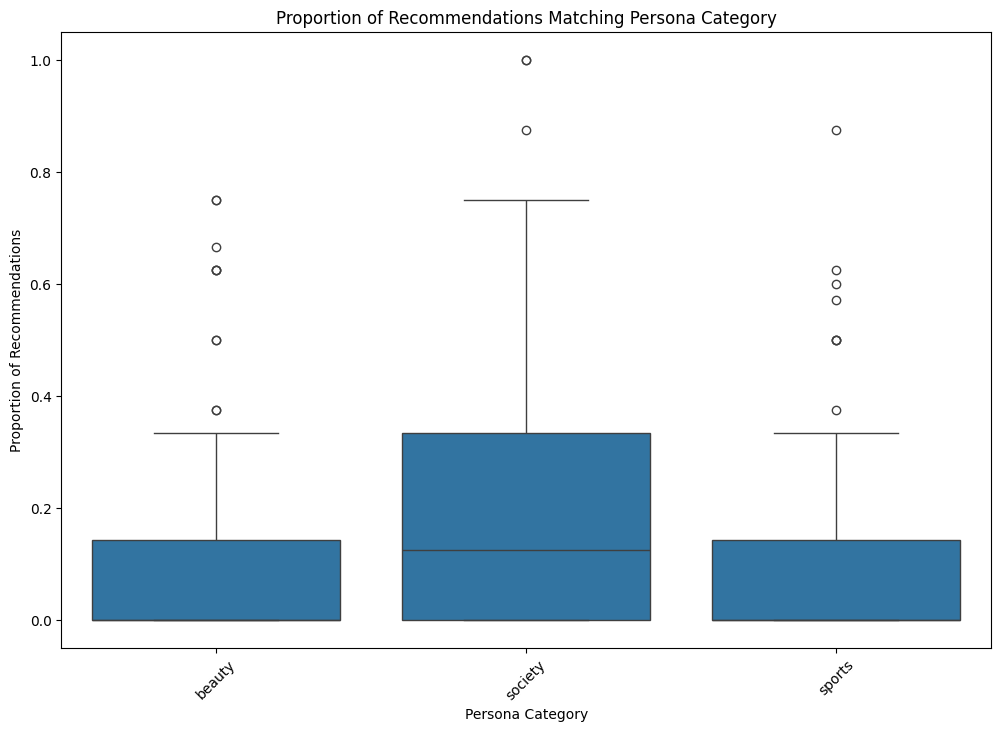

In [20]:
# Boxplot for the proportion of recommendations that match the persona's category, grouped by persona
plt.figure(figsize=(12, 8))
sns.boxplot(x='persona_category', y='prop_persona', data=df_filtered)
plt.title('Proportion of Recommendations Matching Persona Category')
plt.xlabel('Persona Category')
plt.ylabel('Proportion of Recommendations')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.show()

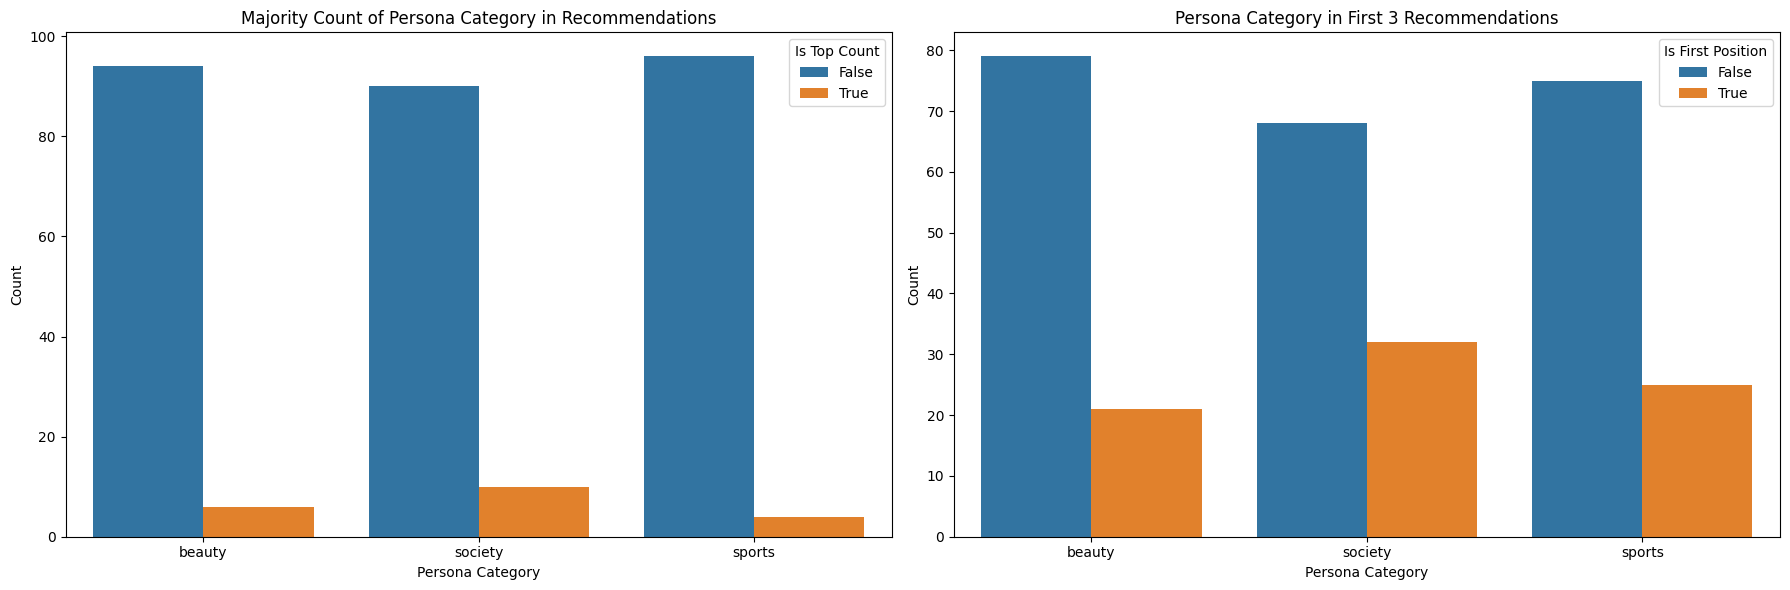

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(x='persona_category', hue='isMajorityCount_persona', data=df_filtered, ax=axes[0])
axes[0].set_title('Majority Count of Persona Category in Recommendations')
axes[0].set_xlabel('Persona Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Is Top Count')

sns.countplot(x='persona_category', hue='isFirst3Position_persona', data=df_filtered, ax=axes[1])
axes[1].set_title('Persona Category in First 3 Recommendations')
axes[1].set_xlabel('Persona Category')
axes[1].set_ylabel('Count')
axes[1].legend(title='Is First Position')

plt.tight_layout()
plt.show()

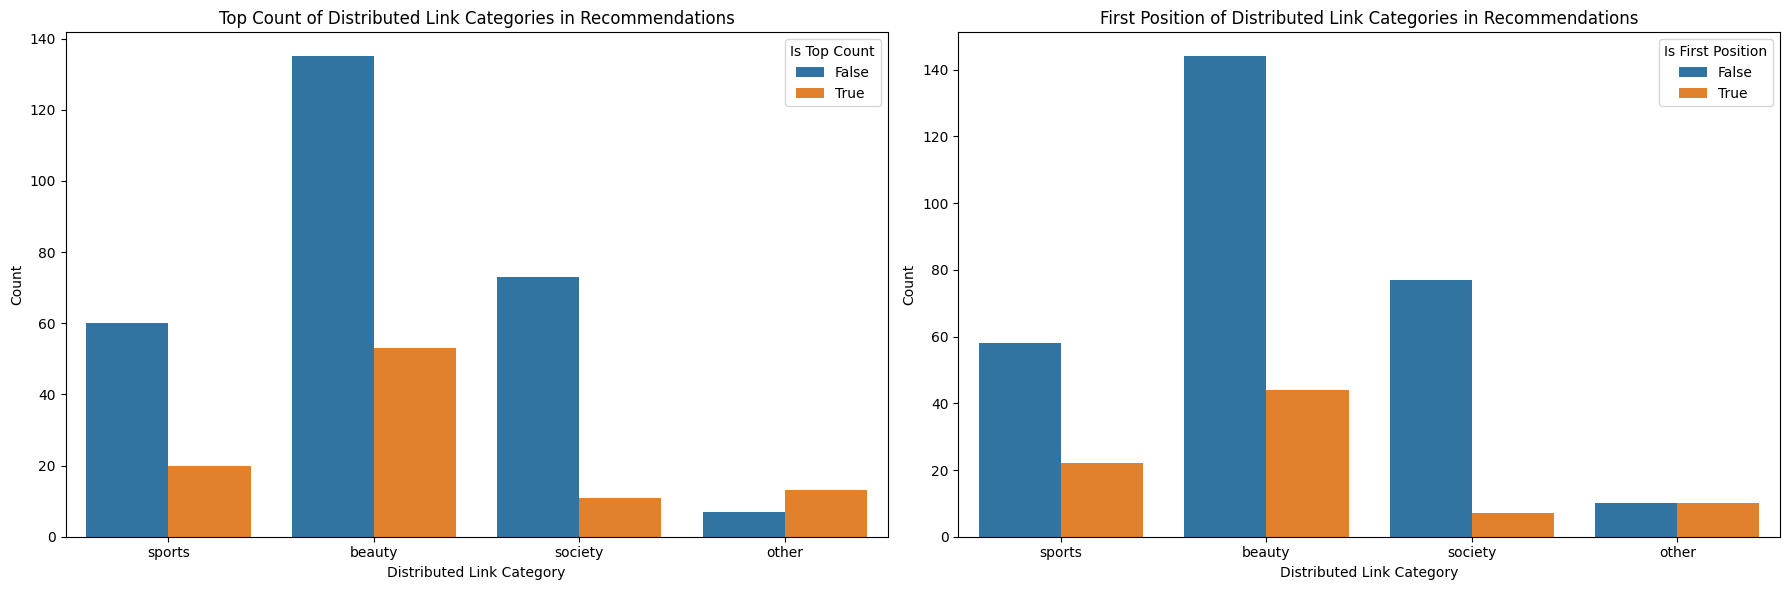

In [22]:
# Bar graph for top count and first position metrics for distributed link categories
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Top Count Analysis for Distributed Link
sns.countplot(x='distributed_link_category', hue='isTopCount_dst', data=df_categorized, ax=axes[0])
axes[0].set_title('Top Count of Distributed Link Categories in Recommendations')
axes[0].set_xlabel('Distributed Link Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Is Top Count')

# First Position Analysis for Distributed Link
sns.countplot(x='distributed_link_category', hue='isFirstPosition_dst', data=df_categorized, ax=axes[1])
axes[1].set_title('First Position of Distributed Link Categories in Recommendations')
axes[1].set_xlabel('Distributed Link Category')
axes[1].set_ylabel('Count')
axes[1].legend(title='Is First Position')

plt.tight_layout()
plt.show()